<a href="https://colab.research.google.com/github/GoAshim/Artificial-Neural-Network-with-TensorFlow/blob/main/06_Binary_Classification_using_TensorFlow_Predict_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Binary Classification using TensorFlow - Predict Customer Churn

## Business Problem
In this project, we are going to use Artificial Neural Network (ANN) with TensorFlow to perform binary classification. We have the dataset of 10000 random customers of a bank with some important features including an indicator that if the customer either remained with or left the bank in the last 6 months. We will apply ANN model on the dataset and see how well that model can predict customer churn. This can benefit the bank to know in advance which customers have more probability of leaving and can build strategy to tackle the problem.

## Data Processing

### Import Libraries

In [70]:
# Libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries for data splitting
from sklearn.model_selection import train_test_split

# Libraries for data feature encoding
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Libraries for feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Import Data

In [3]:
# Read data from the CSV file into a pandas dataframe
df01 = pd.read_csv("/content/sample_data/Churn_Modelling.csv")

In [4]:
# Check first few records of the dataframe
df01.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Exploratory Data Analysis (EDA)

In [6]:
# Shape of the dataframe
print("Number of records: ", df01.shape[0])
print("Number of features: ", df01.shape[1])

Number of records:  10000
Number of features:  14


In [7]:
# Data types of each columns
df01.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

#### Observation:
After reviewing the dataset, we see that the first 3 features are not going to have any impact on determining whether the member will stay or leave the bank. So we are going to drop those 3 columns.

In [8]:
# Drop columns and create new dataframe
df02 = df01.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [9]:
# Review the new dataframe
df02.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Review the statistical distribution of data in numerical columns
df02.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
# Review how records are distributed on each of the two categorical variable
print("Count of records by geography:")
print(df02['Geography'].value_counts())
print("\nCount of records by gender:")
print(df02['Gender'].value_counts())

Count of records by geography:
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Count of records by gender:
Male      5457
Female    4543
Name: Gender, dtype: int64


### Handle Missing Data

In [12]:
# Check for missing data
df02.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Observation:
We see that there is no missing data in the dataset. Hence we don't need to apply any imputation and can move on to the next section.

### Encode Categorical Data

* The gender feature has 2 values, Female and Male. So we will apply label encoding to convert into 0 and 1.
* The geography feature has 3 values France, Germany and Spain. We will apply OneHot encoding which will create 3 columns, one for each country, with value 0 or 1.

#### Label Encoding

In [40]:
# Create a copy of the dataframe before we apply encoding
df03 = df02.copy()

In [42]:
# Label encoding for gender feature
le = LabelEncoder()
df03['Gender'] = le.fit_transform(df03['Gender'])

In [43]:
# Check the dataframe on column encoding
df03.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


#### OneHot Encoding

In [56]:
# Create the OneHot encoder with column transformer
# The benefit of using column transformer is that we can apply multiple encoding at the same time
tr = make_column_transformer((OneHotEncoder(), ['Geography']), remainder='passthrough')

# Fit and transform data
out_arr = tr.fit_transform(df03)

In [61]:
# Get the column names from the output
cols = tr.get_feature_names_out()
cols

array(['onehotencoder__Geography_France',
       'onehotencoder__Geography_Germany',
       'onehotencoder__Geography_Spain', 'remainder__CreditScore',
       'remainder__Gender', 'remainder__Age', 'remainder__Tenure',
       'remainder__Balance', 'remainder__NumOfProducts',
       'remainder__HasCrCard', 'remainder__IsActiveMember',
       'remainder__EstimatedSalary', 'remainder__Exited'], dtype=object)

In [62]:
# Modify the column names
cols = [colname.replace('onehotencoder__', '') for colname in cols]
cols = [colname.replace('remainder__', '') for colname in cols]
cols

['Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [63]:
df04 = pd.DataFrame(out_arr, columns=cols)
df04.head()

,Geography_France,Geography_Germany,Geography_Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,0.0,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,1.0,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,1.0,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,0.0,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


### Split Data into Features and Target

In [64]:
# Create feature dataset
X = df04.drop(columns=['Exited'])
X.head()

,Geography_France,Geography_Germany,Geography_Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,1.0,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


In [65]:
# Create target or label dataset
y = df04['Exited']
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Exited, dtype: float64

### Split Data for Training and Testing

In [66]:
# Split data for training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Check number of records in the training and test data
len(X_train), len(X_test), len(y_train), len(y_test)

(8000, 2000, 8000, 2000)

In [68]:
# Check few records of the training features
X_train.head()

,Geography_France,Geography_Germany,Geography_Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,1.0,0.0,0.0,686.0,1.0,32.0,6.0,0.00,2.0,1.0,1.0,179093.26
1561,0.0,1.0,0.0,632.0,1.0,42.0,4.0,119624.60,2.0,1.0,1.0,195978.86
1670,0.0,0.0,1.0,559.0,1.0,24.0,3.0,114739.92,1.0,1.0,0.0,85891.02
6087,1.0,0.0,0.0,561.0,0.0,27.0,9.0,135637.00,1.0,1.0,0.0,153080.40
6669,1.0,0.0,0.0,517.0,1.0,56.0,9.0,142147.32,1.0,0.0,0.0,39488.04


In [69]:
# Check few records of the testing features
X_test.head()

,Geography_France,Geography_Germany,Geography_Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,0.0,1.0,0.0,596.0,1.0,32.0,3.0,96709.07,2.0,0.0,0.0,41788.37
4684,1.0,0.0,0.0,623.0,1.0,43.0,1.0,0.00,2.0,1.0,1.0,146379.30
1731,0.0,0.0,1.0,601.0,0.0,44.0,4.0,0.00,2.0,1.0,0.0,58561.31
4742,0.0,1.0,0.0,506.0,1.0,59.0,8.0,119152.10,2.0,1.0,1.0,170679.74
4521,0.0,0.0,1.0,560.0,0.0,27.0,7.0,124995.98,1.0,1.0,1.0,114669.79


### Scale Features
We know that ANN model performs best when all features are in the same scale. In our feature dataset, some features already have value in 0 or 1, however there are features such as Age and many others which are not within 0 and 1 scale. So we will apply Feature Scaling using both Standard Scaler as well as Min Max Scaler and see which one gives better result with our ANN model.

#### Standard Scaler

In [71]:
st = StandardScaler()
X_train_sc = st.fit_transform(X_train)
X_test_sc = st.transform(X_test)

In [82]:
# Check the first record of train data
X_train_sc[1, ]

array([-0.99850112,  1.72572313, -0.57638802, -0.20389777,  0.91324755,
        0.29493847, -0.3483691 ,  0.69683765,  0.80843615,  0.64920267,
        0.97481699,  1.6612541 ])

#### MinMax Scaler

In [74]:
mm = MinMaxScaler()
X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.transform(X_test)

In [83]:
# Check the first record of train data
X_train_mm[1, ]

array([0.        , 1.        , 0.        , 0.564     , 1.        ,
       0.32432432, 0.4       , 0.47678561, 0.33333333, 1.        ,
       1.        , 0.98002868])

## Deep Learning Model

In this section we will build the Artificial Neural Network model using Tensorflow. Then we will train the model with our training data. Once the model is trained, we will use that to make prediction on test data and evaluate the performance of our model.

### Import Libraries

In [84]:
# Import libraries for ANN model

import tensorflow as tf

### Build the ANN Model

#### Multi-step Model Creation

In [110]:
# Instantiate the model
ann1 = tf.keras.models.Sequential()

In [111]:
# Add the first input layer
ann1.add(tf.keras.layers.Input(shape=(X_train.shape[1], )))

In [112]:
# Add the first hidden layer
ann1.add(tf.keras.layers.Dense(units=16, activation='relu'))

In [113]:
# Add the second hidden layer
ann1.add(tf.keras.layers.Dense(units=8, activation='relu'))

In [114]:
# Add the final output layer
ann1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#### One-step Model Creation

In [115]:
# Or we could have built the model in one line of code
ann2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], )),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

### Compile the Model

In [116]:
# Compile the model with adam optimizer, which is the most common optimizer to
# optimize the loss. For loss, we use binary cross entropy as we are dealing with
# binary classification problem and for metrics we choose accuracy.

ann1.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy']
             )

ann2.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy']
             )

### Train the model

In [117]:
# Train the first ANN model on standdard scaled data
hist1 = ann1.fit(X_train_sc, y_train, epochs=100, verbose=0)

In [118]:
# Train the second model with the Min Max scaled data
hist2 = ann2.fit(X_train_mm, y_train, epochs=100, verbose=0)

### Evaluate Model Performance

#### Model Evaluation

In [119]:
# Evaluate the first model on training data
print("Result of model evaluation on training data: ", ann1.evaluate(X_train_sc, y_train))
print("Result of model evaluation on test data: ", ann1.evaluate(X_test_sc, y_test))

250/250 [==============================] - 1s 3ms/step - loss: 0.3141 - accuracy: 0.8698
Result of model evaluation on training data:  [0.3140970766544342, 0.8697500228881836]
63/63 [==============================] - 0s 3ms/step - loss: 0.3422 - accuracy: 0.8645
Result of model evaluation on test data:  [0.34224802255630493, 0.8644999861717224]


In [120]:
# Evaluate the second model on training data
print("Result of model evaluation on training data: ", ann2.evaluate(X_train_mm, y_train))
print("Result of model evaluation on test data: ", ann2.evaluate(X_test_mm, y_test))

250/250 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8665
Result of model evaluation on training data:  [0.33755290508270264, 0.8665000200271606]
63/63 [==============================] - 0s 2ms/step - loss: 0.3412 - accuracy: 0.8620
Result of model evaluation on test data:  [0.3412061929702759, 0.8619999885559082]


##### Observation
We see that the identical model one trained on the standard scaled data and another trained on the MinMax scaled data are both producing very close accuracy. We will take the first model as it's producing marginally better accuracy result.

#### Loss & Accuracy Curve

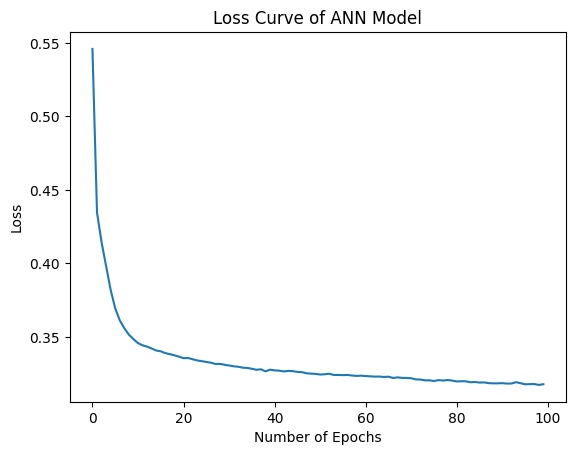

In [123]:
# Plot the loss curve for the first model
plt.plot(hist1.history['loss'])
plt.title("Loss Curve of ANN Model")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss");

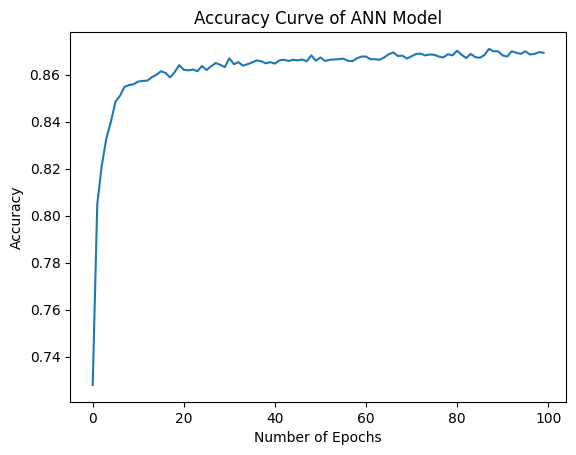

In [124]:
# Plot the accuracy curve for the first model
plt.plot(hist1.history['accuracy'])
plt.title("Accuracy Curve of ANN Model")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy");

##### Observation
From the loss curve we see that the loss dropped  a lot in first few epochs and after around 10 epochs it flattened out around 30%. Similarly the accuracy jumped to about 85% within first few epochs and then after around 10 epochs it flattened out around 86%.